Course Code: AIB551

Title of the ECA: Natural Language Processing

Name:

LER KIAT CHUN (PI No: E2471510)

RUSCONI FLAVIO MARCO (PI No: K2471513)

OU YANG YU (PI No: CE171038)

ARUNA E (PI No: W2172417)

Submission Date: 24 March 2025

In [ ]:
# ==============================================
# 0. IMPORT LIBRARIES & DOWNLOAD RESOURCES
# ==============================================

# Import standard libraries for regular expressions, numerical operations, and data manipulation
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import PyTorch for deep learning functionalities
import torch
import torch.nn.functional as F

# Import Hugging Face Transformers library for NLP tasks
from transformers import AutoTokenizer, AutoModel, pipeline

# Import spaCy for NLP processing
import spacy

# Import NLTK for natural language processing utilities
import nltk
from nltk.tokenize import word_tokenize  # Tokenization (splitting text into words)
from nltk.corpus import stopwords  # Stopwords list for filtering out common words
from nltk.stem import WordNetLemmatizer, PorterStemmer  # Lemmatization & Stemming
from nltk.util import ngrams  # Generating n-grams from text

# Import Scikit-learn libraries for feature extraction and machine learning models
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # Text vectorization
from sklearn.decomposition import LatentDirichletAllocation, NMF  # Topic modeling algorithms
from sklearn.metrics import silhouette_score  # Evaluation metric for clustering
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances  # Similarity measures
from sklearn.cluster import KMeans  # Clustering algorithm

# Import collections for counting word frequencies
from collections import Counter

# Import WordCloud for generating word clouds
from wordcloud import WordCloud

# Import Venn diagram visualization tool
from matplotlib_venn import venn2

# Import seaborn for advanced data visualization
import seaborn as sns

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK datasets if they are not already available
nltk.download('punkt')  # Tokenizer model
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('stopwords')  # Common stopwords list
nltk.download('averaged_perceptron_tagger')  # POS tagging model

# Load a pre-trained spaCy model for NLP processing
# "en_core_web_lg" has better word vectors
nlp_spacy = spacy.load("en_core_web_lg")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thade\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thade\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thade\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\thade\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# ==============================================
# 1. DOCUMENT REPRESENTATION AND PREPROCESSING
# ==============================================

# Sample Documents (Annual Report & Marketing Brochure)
annual_report = (
    "Company’s Strategic Overview and Financial Performance\n"
    " In 2023, we successfully expanded our operations in international markets, "
    "increasing our presence in key regions by 25%. Our commitment to sustainability has led to a reduction in "
    "carbon emissions by 10% year-over-year, and we have continued to innovate through digital transformation. "
    "This focus on operational efficiency has resulted in a 15% increase in net profit, and we are confident that "
    "our strategic investments in technology will drive continued growth in the coming years."
)

marketing_brochure = (
    "Our Commitment to Innovation and Sustainability\n"
    " At company NextUs, innovation and sustainability are at the heart of everything we do. We’re proud of our progress "
    "in expanding globally, with a 25% growth in international markets in 2023. Our eco-friendly initiatives have "
    "reduced carbon emissions by 10%, and we continue to lead in digital transformation, creating value for our customers "
    "and stakeholders. We’re committed to driving operational efficiency and maintaining high performance in all areas of our business."
)

In [ ]:
# 1.1 Basic Preprocessing Function
def preprocess_text(text):
    """
    Function to clean and normalize text data.
    Steps performed:
    1. Convert curly apostrophes to standard apostrophes.
    2. Remove standalone numbers and percentages.
    3. Remove unwanted characters while preserving sentence structure.
    4. Normalize whitespace and convert text to lowercase.
    """
    # Normalize curly apostrophes and trim whitespace
    text = text.replace("’", "'").strip()

    # Remove standalone numbers and percentages
    text = re.sub(r"\b\d+%?\b", "", text)

    # Remove unwanted characters except letters, spaces, periods, apostrophes, and hyphens
    text = re.sub(r"[^a-zA-Z\s.'-]", "", text)

    # Normalize multiple spaces to a single space
    text = re.sub(r"\s+", " ", text)

    # Convert text to lowercase
    return text.lower()

# Preprocess both documents: Annual Report and Marketing Brochure
annual_report_clean = preprocess_text(annual_report)
marketing_brochure_clean = preprocess_text(marketing_brochure)

# Print processed versions of the documents
print("Processed Annual Report:")
print(annual_report_clean)
print("\nProcessed Marketing Brochure:")
print(marketing_brochure_clean)

Processed Annual Report:
company's strategic overview and financial performance in we successfully expanded our operations in international markets increasing our presence in key regions by . our commitment to sustainability has led to a reduction in carbon emissions by year-over-year and we have continued to innovate through digital transformation. this focus on operational efficiency has resulted in a increase in net profit and we are confident that our strategic investments in technology will drive continued growth in the coming years.

Processed Marketing Brochure:
our commitment to innovation and sustainability at company nextus innovation and sustainability are at the heart of everything we do. we're proud of our progress in expanding globally with a growth in international markets in . our eco-friendly initiatives have reduced carbon emissions by and we continue to lead in digital transformation creating value for our customers and stakeholders. we're committed to driving operat

In [ ]:
# 1.2 Business-Specific Terminology Handling

# Define a list of business-related terms for analysis
business_terms = [
    "sustainability", "operational efficiency", "digital transformation",
    "international markets", "carbon emissions", "stakeholders",
    "growth", "innovation", "technology", "strategic investments"
]

def highlight_business_terms(text, terms):
    """
    Identify and count business-specific terms in text.

    Parameters:
    text (str): The input text to analyze.
    terms (list): A list of business-related terms to search for.

    Returns:
    dict: A dictionary with term counts found in the text.
    """
    text_lower = text.lower()  # Convert text to lowercase for case-insensitive matching
    term_counts = {}  # Dictionary to store term frequencies

    # Loop through each business term and count occurrences in the text
    for term in terms:
        count = text_lower.count(term.lower())
        if count > 0:  # Only store terms that appear in the text
            term_counts[term] = count

    return term_counts

# Identify business terms in both documents
annual_report_business_terms = highlight_business_terms(annual_report, business_terms)
marketing_brochure_business_terms = highlight_business_terms(marketing_brochure, business_terms)

# Print detected business terms and their frequencies for both documents
print("\nBusiness Terms in Annual Report:")
print(annual_report_business_terms)
print("\nBusiness Terms in Marketing Brochure:")
print(marketing_brochure_business_terms)


Business Terms in Annual Report:
{'sustainability': 1, 'operational efficiency': 1, 'digital transformation': 1, 'international markets': 1, 'carbon emissions': 1, 'growth': 1, 'technology': 1, 'strategic investments': 1}

Business Terms in Marketing Brochure:
{'sustainability': 2, 'operational efficiency': 1, 'digital transformation': 1, 'international markets': 1, 'carbon emissions': 1, 'stakeholders': 1, 'growth': 1, 'innovation': 2}


In [ ]:
# ==============================================
# 2. DOCUMENT EMBEDDING WITH DISTILBERT
# ==============================================

# Load a pre-trained DistilBERT model and tokenizer for document embedding
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def get_document_embedding(text, tokenizer, model):
    """
    Converts a text document into an embedding vector using DistilBERT.

    Steps:
    1. Tokenize the text and convert it into input tensors.
    2. Pass the tokenized input through the model (without gradient calculations).
    3. Compute document embedding as the mean of token embeddings.

    Parameters:
    - text (str): Input document as text.
    - tokenizer (AutoTokenizer): Tokenizer to convert text into tokens.
    - model (AutoModel): Pretrained Transformer model to generate embeddings.

    Returns:
    - torch.Tensor: A single vector representing the document embedding.
    """
    # Tokenize input text with truncation and padding
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

    # Disable gradient calculations for efficiency
    with torch.no_grad():
        outputs = model(**inputs)  # Get model outputs

    # Compute document embedding by averaging all token embeddings
    return torch.mean(outputs.last_hidden_state, dim=1)

# Generate embeddings for both documents
embedding_annual = get_document_embedding(annual_report_clean, tokenizer, model)
embedding_marketing = get_document_embedding(marketing_brochure_clean, tokenizer, model)

# Count the number of tokens in each processed document
num_tokens_annual = len(tokenizer(annual_report_clean)["input_ids"])
num_tokens_marketing = len(tokenizer(marketing_brochure_clean)["input_ids"])

# Print token count for each document
print(f"\nProcessed Annual Report Token Count: {num_tokens_annual}")
print(f"Processed Marketing Brochure Token Count: {num_tokens_marketing}")

# Display Embedding Statistics
# Extract and print statistics for Annual Report embedding
annual_shape = embedding_annual.shape  # Shape of the embedding tensor
annual_mean = embedding_annual.mean().item()  # Mean value of the embedding
annual_std = embedding_annual.std().item()  # Standard deviation of embedding values

print(f"\nAnnual Report Embedding Shape: {annual_shape}")
print(f"Annual Report Embedding Mean: {annual_mean:.4f}")
print(f"Annual Report Embedding Std: {annual_std:.4f}")

# Extract and print statistics for Marketing Brochure embedding
marketing_shape = embedding_marketing.shape  # Shape of the embedding tensor
marketing_mean = embedding_marketing.mean().item()  # Mean value of the embedding
marketing_std = embedding_marketing.std().item()  # Standard deviation of embedding values

print(f"\nMarketing Brochure Embedding Shape: {marketing_shape}")
print(f"Marketing Brochure Embedding Mean: {marketing_mean:.4f}")
print(f"Marketing Brochure Embedding Std: {marketing_std:.4f}")


Processed Annual Report Token Count: 89
Processed Marketing Brochure Token Count: 87

Annual Report Embedding Shape: torch.Size([1, 768])
Annual Report Embedding Mean: -0.0107
Annual Report Embedding Std: 0.2972

Marketing Brochure Embedding Shape: torch.Size([1, 768])
Marketing Brochure Embedding Mean: -0.0107
Marketing Brochure Embedding Std: 0.2878


In [ ]:
# ==============================================
# 3. SIMILARITY ANALYSIS
# ==============================================
# Compute similarity metrics between the document embeddings

# Euclidean Distance: Measures the straight-line distance between the two embedding vectors.
# A smaller Euclidean distance indicates higher similarity.
euclidean_distance = torch.norm(embedding_annual - embedding_marketing).item()

# Cosine Similarity: Measures the cosine of the angle between the two embedding vectors.
# Values range from -1 (opposite) to 1 (identical), where a higher value indicates higher similarity.
cosine_similarity_score = F.cosine_similarity(embedding_annual, embedding_marketing).item()

# Print similarity metrics
print("\nSimilarity Metrics:")
print("Euclidean Distance:", euclidean_distance)
print("Cosine Similarity:", cosine_similarity_score)

# Define qualitative similarity levels based on cosine similarity score.
if cosine_similarity_score > 0.9:
    similarity_level = "high"  # Documents are very similar
elif cosine_similarity_score > 0.7:
    similarity_level = "moderate"  # Documents have some similarity
else:
    similarity_level = "low"  # Documents are quite different

# Display similarity interpretation
print(f"\nThe cosine similarity score of {cosine_similarity_score:.2f} indicates a {similarity_level} alignment between the two documents.")


Similarity Metrics:
Euclidean Distance: 2.2320804595947266
Cosine Similarity: 0.9625867605209351

The cosine similarity score of 0.96 indicates a high alignment between the two documents.


In [ ]:
# ==============================================
# 4. KEY CONCEPT EXTRACTION
# ==============================================
# --- (a) TF-IDF Based Extraction ---
def lemmatize_text(text):
    """
    Preprocess and lemmatize text for feature extraction.

    Steps:
    1. Tokenize text into words.
    2. Convert tokens to lowercase.
    3. Remove stopwords (e.g., 'the', 'is', 'and').
    4. Apply lemmatization (reduce words to base form).

    Parameters:
    - text (str): Input text document.

    Returns:
    - str: Preprocessed text with lemmatized words.
    """
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    lemmatizer = WordNetLemmatizer()

    # Lemmatize tokens and remove stopwords & non-alphabetic words
    lemmatized_tokens = [
        lemmatizer.lemmatize(token) for token in tokens
        if token.isalpha() and token not in set(stopwords.words('english'))
    ]

    return " ".join(lemmatized_tokens)  # Join tokens back into a string

# Apply lemmatization to both documents
lem_annual_report = lemmatize_text(annual_report)
lem_marketing_brochure = lemmatize_text(marketing_brochure)

# Create list of documents and compute TF-IDF
lem_documents = [lem_annual_report, lem_marketing_brochure] # Create a list of lemmatized documents
vectorizer = TfidfVectorizer() # Initialize a TF-IDF vectorizer
tfidf_matrix = vectorizer.fit_transform(lem_documents) # Compute the TF-IDF matrix
feature_names = vectorizer.get_feature_names_out() # Extract feature names

### IDENTIFY TOP 5 COMMON WORDS (TF-IDF) ###

# Identify top 5 common words (present in both documents)
common_words = [
    (word, tfidf_matrix[0, i] + tfidf_matrix[1, i])  # Sum TF-IDF scores across documents
    for i, word in enumerate(feature_names)
    if tfidf_matrix[0, i] > 0 and tfidf_matrix[1, i] > 0  # Ensure the word exists in both docs
]

# Select the top 5 most significant common words based on TF-IDF score
top5_common = sorted(common_words, key=lambda x: x[1], reverse=True)[:5]

# Print top 5 common words
print("\nTop 5 Common Words (TF-IDF):")
for word, score in top5_common:
    print(f"{word}: {score:.4f}")

### IDENTIFY TOP 5 UNIQUE WORDS PER DOCUMENT ###

# Extract words unique to the Annual Report
unique_doc1 = [
    (word, tfidf_matrix[0, i])  # Keep words that appear only in doc1 (Annual Report)
    for i, word in enumerate(feature_names)
    if tfidf_matrix[0, i] > 0 and tfidf_matrix[1, i] == 0
]

# Extract words unique to the Marketing Brochure
unique_doc2 = [
    (word, tfidf_matrix[1, i])  # Keep words that appear only in doc2 (Marketing Brochure)
    for i, word in enumerate(feature_names)
    if tfidf_matrix[1, i] > 0 and tfidf_matrix[0, i] == 0
]

# Select the top 5 unique words for each document based on TF-IDF score
top5_unique_doc1 = sorted(unique_doc1, key=lambda x: x[1], reverse=True)[:5]
top5_unique_doc2 = sorted(unique_doc2, key=lambda x: x[1], reverse=True)[:5]

# Print the top 5 unique words in the Annual Report
print("\nTop 5 Unique Words in Annual Report:")
for word, score in top5_unique_doc1:
    print(f"{word}: {score:.4f}")

# Print the top 5 unique words in the Marketing Brochure
print("\nTop 5 Unique Words in Marketing Brochure:")
for word, score in top5_unique_doc2:
    print(f"{word}: {score:.4f}")


Top 5 Common Words (TF-IDF):
sustainability: 0.3634
carbon: 0.2397
commitment: 0.2397
company: 0.2397
digital: 0.2397

Top 5 Unique Words in Annual Report:
continued: 0.3262
strategic: 0.3262
coming: 0.1631
confident: 0.1631
drive: 0.1631

Top 5 Unique Words in Marketing Brochure:
innovation: 0.3476
area: 0.1738
business: 0.1738
committed: 0.1738
continue: 0.1738



Common Entities between the Annual Report and Marketing Brochure:
Entity: 2023, Category: DATE
Entity: 10%, Category: PERCENT
Entity: 25%, Category: PERCENT

Entities unique to the Annual Report:
Entity: the coming years, Category: DATE
Entity: 15%, Category: PERCENT

Number of unique non-entity tokens: 62
For 2 clusters, silhouette score: 0.0477
For 3 clusters, silhouette score: 0.0537
For 4 clusters, silhouette score: 0.0545
For 5 clusters, silhouette score: 0.0568


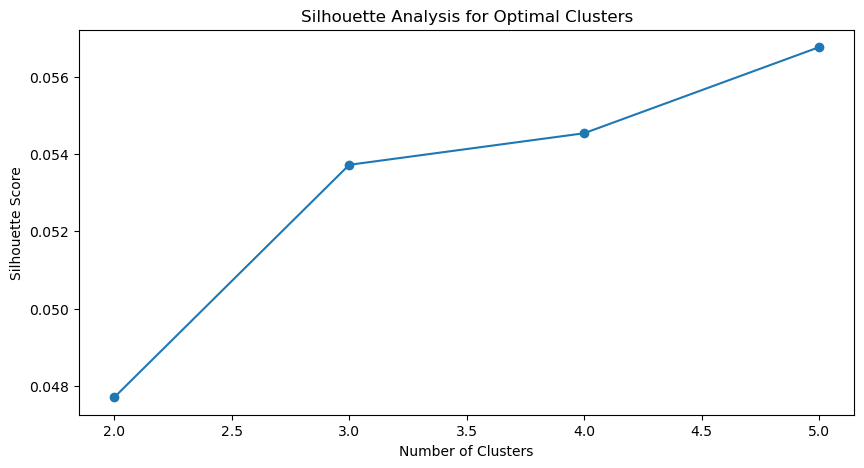


Optimal number of clusters: 5

Clusters of Important Keywords:
Cluster 2: Company, Financial, markets, net, profit, investments, growth, customers, business
Cluster 4: Strategic, operations, international, key, commitment, sustainability, innovate, focus, operational, Innovation, globally, initiatives, stakeholders
Cluster 3: Overview, successfully, expanded, presence, regions, led, year, continued, transformation, resulted, confident, drive, coming, years, NextUs, heart, proud, progress, expanding, eco, friendly, continue, lead, creating, committed, driving, high, areas
Cluster 1: Performance, increasing, reduction, carbon, emissions, efficiency, increase, reduced, value, maintaining
Cluster 0: digital, technology


In [ ]:
# --- (b) Named Entity Recognition (NER) Extraction with spaCy and K-Means Clustering ---
# Function to extract named entities from text
def extract_entities(text):
    """
    Extracts named entities from a given text using spaCy.
    - Filters out single-character entities.
    - Displays the extracted entities using displacy.
    """
    doc = nlp_spacy(text)  # Process the text with the spaCy NLP model
    entities = {ent.text: ent.label_ for ent in doc.ents if len(ent.text) > 1}  # Store entity text and its label

    return entities

# Extract named entities from both documents
entities_annual = extract_entities(annual_report)  # Named entities from the annual report
entities_marketing = extract_entities(marketing_brochure)  # Named entities from the marketing brochure

# Identify common named entities between both documents
common_entities = set(entities_annual.keys()).intersection(set(entities_marketing.keys()))

if common_entities:
    print("\nCommon Entities between the Annual Report and Marketing Brochure:")
    for entity in common_entities:
        print(f"Entity: {entity}, Category: {entities_annual[entity]}")
else:
    print("\nNo common entities found.")

# Identify unique named entities in each document
unique_entities_annual = set(entities_annual.keys()) - set(entities_marketing.keys())
unique_entities_marketing = set(entities_marketing.keys()) - set(entities_annual.keys())

# Print unique named entities in the annual report
if unique_entities_annual:
    print("\nEntities unique to the Annual Report:")
    for entity in unique_entities_annual:
        print(f"Entity: {entity}, Category: {entities_annual[entity]}")

# Print unique named entities in the marketing brochure
if unique_entities_marketing:
    print("\nEntities unique to the Marketing Brochure:")
    for entity in unique_entities_marketing:
        print(f"Entity: {entity}, Category: {entities_marketing[entity]}")

# --- Token Filtering and K-Means Clustering Analysis ---

# Combine both documents for clustering analysis
combined_text = annual_report + " " + marketing_brochure
doc = nlp_spacy(combined_text)  # Process the combined text with spaCy

# Filter out unwanted tokens:
# - Keep only alphabetic words (remove numbers, punctuation)
# - Remove stopwords (common words like "the", "is", etc.)
# - Remove short words (less than 3 characters)
tokens = [token for token in doc if token.is_alpha and not token.is_stop and len(token) > 2]

# Remove duplicate tokens (case-insensitive)
unique_tokens = {}
for token in tokens:
    token_lower = token.text.lower()
    if token_lower not in unique_tokens:
        unique_tokens[token_lower] = token

# Convert unique tokens back into a list for clustering
unique_tokens_list = list(unique_tokens.values())
print(f"\nNumber of unique non-entity tokens: {len(unique_tokens_list)}")

# Extract word embeddings from the tokens for clustering
X = np.array([token.vector for token in unique_tokens_list])

# Determine the optimal number of clusters using Elbow Method and Silhouette Score
# - The minimum number of clusters is 2.
# - The maximum is either 8 or the total number of tokens (whichever is smaller).
max_clusters = min(5, len(unique_tokens_list))
range_n_clusters = range(2, max_clusters + 1)

sse = []  # List to store Sum of Squared Errors (SSE) for each cluster count
silhouette_scores = []  # List to store silhouette scores for each cluster count

# Iterate through possible cluster sizes to evaluate performance
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=50)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # Store the SSE (lower is better)
    silhouette_avg = silhouette_score(X, kmeans.labels_)  # Compute silhouette score
    silhouette_scores.append(silhouette_avg)
    print(f"For {n_clusters} clusters, silhouette score: {silhouette_avg:.4f}")

# Plot Silhouette Scores for different cluster sizes
plt.figure(figsize=(10, 5))
plt.plot(list(range_n_clusters), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal Clusters")
plt.show()

# Select the optimal number of clusters based on the highest silhouette score
optimal_index = np.argmax(silhouette_scores)  # Get the index of the best silhouette score
optimal_clusters = list(range_n_clusters)[optimal_index]  # Retrieve the corresponding number of clusters
print(f"\nOptimal number of clusters: {optimal_clusters}")

# Perform final K-Means clustering using the optimal cluster count
kmeans_opt = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=50)
kmeans_opt.fit(X)
labels_opt = kmeans_opt.labels_  # Get cluster labels for each word

# Group words by their assigned cluster
clusters = {}
for label, token in zip(labels_opt, unique_tokens_list):
    clusters.setdefault(label, []).append(token.text)  # Store words under their assigned cluster

# Print the clustered keywords
print("\nClusters of Important Keywords:")
for cluster_id, words in clusters.items():
    print(f"Cluster {cluster_id}: {', '.join(words)}")

In [ ]:
# # --- (c) Named Entity Recognition (NER) Models ---

# Define a dictionary of pre-trained NER models
# - "distilbert" uses a lightweight DistilBERT model trained for NER
# - "bert" uses a BERT-based model with case insensitivity for better generalization
# - "wiki" is a multilingual NER model that can recognize entities in multiple languages
ner_models = {
    "distilbert": "dslim/distilbert-NER",
    "bert": "dslim/bert-base-NER-uncased",
    "wiki": "Babelscape/wikineural-multilingual-ner"
}

# Load NER pipelines for each model
# - The `pipeline` function loads the pre-trained models for Named Entity Recognition (NER).
# - `aggregation_strategy="simple"` merges entity tokens into full words.
# - The `framework="pt"` ensures PyTorch is used for inference.
ner_pipelines = {
    name: pipeline(
        "ner",  # Specify task as Named Entity Recognition
        model=model,  # Load the corresponding model
        tokenizer=model,  # Use the same tokenizer as the model
        framework="pt",  # Use PyTorch for computations
        aggregation_strategy="simple"  # Merge detected entity tokens into full entity names
    ) for name, model in ner_models.items()
}

# Perform Named Entity Recognition (NER) on the documents using each model
for model_name, ner_pipeline in ner_pipelines.items():
    # Extract and print named entities from the Annual Report
    print(f"\nUnique Entities extracted from Annual Report ({model_name}):")
    entities_annual = ner_pipeline(annual_report)  # Run NER model on the annual report text
    for entity in entities_annual:
        print(entity)  # Print extracted named entities along with entity type (e.g., PERSON, ORGANIZATION)

    # Extract and print named entities from the Marketing Brochure
    print(f"\nUnique Entities extracted from Marketing Brochure ({model_name}):")
    entities_marketing = ner_pipeline(marketing_brochure)  # Run NER model on the marketing brochure text
    for entity in entities_marketing:
        print(entity)  # Print extracted named entities along with entity type

Device set to use cuda:0
Some weights of the model checkpoint at dslim/bert-base-NER-uncased were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0
Device set to use cuda:0



Unique Entities extracted from Annual Report (distilbert):
{'entity_group': 'ORG', 'score': np.float32(0.95184684), 'word': 'Company', 'start': 0, 'end': 7}

Unique Entities extracted from Marketing Brochure (distilbert):

Unique Entities extracted from Annual Report (bert):

Unique Entities extracted from Marketing Brochure (bert):
{'entity_group': 'ORG', 'score': np.float32(0.99383736), 'word': 'nextus', 'start': 60, 'end': 66}

Unique Entities extracted from Annual Report (wiki):
{'entity_group': 'ORG', 'score': np.float32(0.5416366), 'word': 'Company ’', 'start': 0, 'end': 8}
{'entity_group': 'MISC', 'score': np.float32(0.74460584), 'word': 'Strategic Overview and Financial Performance', 'start': 10, 'end': 54}

Unique Entities extracted from Marketing Brochure (wiki):
{'entity_group': 'ORG', 'score': np.float32(0.9035077), 'word': 'Our Commitment to Innovation and Sustainability', 'start': 0, 'end': 47}


In [ ]:
# --- (d) Topic Modeling with LDA and NMF ---
def perform_topic_modeling(documents, num_topics):
    # LDA using CountVectorizer
    # Convert documents into a document-term matrix using CountVectorizer (word frequency)
    cv = CountVectorizer(stop_words='english')
    count_matrix = cv.fit_transform(documents)
    feature_names_cv = cv.get_feature_names_out()  # Get feature names (words)

    # Train an LDA model to extract topics
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42, max_iter=50)
    lda_model.fit(count_matrix)

    # Extract top words for each LDA topic
    lda_topics = []
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words_idx = topic.argsort()[:-8:-1]  # Get indices of top words
        top_words = [feature_names_cv[i] for i in top_words_idx]  # Get word names
        lda_topics.append(top_words)  # Store top words for the topic

    # NMF using TF-IDF
    # Convert documents into a TF-IDF matrix (better for NMF)
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
    feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()  # Get feature names (words)

    # Train an NMF model to extract topics
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_model.fit(tfidf_matrix)

    # Extract top words for each NMF topic
    nmf_topics = []
    for topic_idx, topic in enumerate(nmf_model.components_):
        top_words_idx = topic.argsort()[:-8:-1]  # Get indices of top words
        top_words = [feature_names_tfidf[i] for i in top_words_idx]  # Get word names
        nmf_topics.append(top_words)  # Store top words for the topic

    # Return both LDA and NMF topics, along with the trained NMF model and TF-IDF matrix
    return {
        "lda": lda_topics,
        "nmf": nmf_topics,
        "nmf_model": nmf_model,
        "tfidf_matrix": tfidf_matrix
    }

# Perform topic modeling on the lemmatized documents with 5 topics
topic_models = perform_topic_modeling(lem_documents, num_topics=5)

# Print topics identified by LDA
print("\nLDA Topics:")
for i, topic in enumerate(topic_models["lda"], 1):
    print(f"Topic {i}: {', '.join(topic)}")

# Print topics identified by NMF
print("\nNMF Topics:")
for i, topic in enumerate(topic_models["nmf"], 1):
    print(f"Topic {i}: {', '.join(topic)}")


LDA Topics:
Topic 1: sustainability, innovation, transformation, performance, market, commitment, company
Topic 2: transformation, performance, operational, market, digital, commitment, company
Topic 3: transformation, performance, operational, market, digital, commitment, company
Topic 4: transformation, performance, operational, market, digital, commitment, company
Topic 5: strategic, continued, technology, reduction, region, successfully, resulted

NMF Topics:
Topic 1: continued, strategic, transformation, sustainability, performance, operational, international
Topic 2: innovation, sustainability, progress, nextus, maintaining, lead, expanding
Topic 3: focus, overview, efficiency, coming, digital, continued, strategic
Topic 4: key, strategic, continued, presence, profit, increase, led
Topic 5: area, carbon, growth, transformation, driving, international, committed


In [ ]:
# --- (e) Sentiment Analysis ---
# Define the sentiment analysis models to use
models = {
    "distilbert": "distilbert/distilbert-base-uncased-finetuned-sst-2-english",  # Binary (Positive/Negative)
    "roberta": "cardiffnlp/twitter-roberta-base-sentiment-latest",  # Multi-class (Negative/Neutral/Positive)
    "bert": "nlptown/bert-base-multilingual-uncased-sentiment",  # 1 to 5 stars sentiment scale
}

# Load sentiment analysis pipelines for all models
# The device=0 argument runs the models on a GPU if available
sentiment_pipelines = {name: pipeline("sentiment-analysis", model=model_name, device=0) for name, model_name in models.items()}

# Function to analyze sentiment with all models
def analyze_sentiment(text):
    results = {} # Dictionary to store results from each model
    for model_name, pipeline_model in sentiment_pipelines.items():
        results[model_name] = pipeline_model(text) # The input text to analyze.
    return results # A dictionary containing sentiment analysis results from each model.

# Perform Sentiment Analysis on Annual Report and Marketing brochure
sentiment_results_annual = analyze_sentiment(annual_report)
sentiment_results_marketing = analyze_sentiment(marketing_brochure)

# Print Sentiment Analysis Results
print("\n--- Sentiment Analysis Results ---")
print("Annual Report:")
for model, result in sentiment_results_annual.items():
    print(f"{model}: {result}")

print("\nMarketing Brochure:")
for model, result in sentiment_results_marketing.items():
    print(f"{model}: {result}")

Device set to use cuda:0
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0
Device set to use cuda:0



--- Sentiment Analysis Results ---
Annual Report:
distilbert: [{'label': 'POSITIVE', 'score': 0.9996920824050903}]
roberta: [{'label': 'positive', 'score': 0.9129535555839539}]
bert: [{'label': '5 stars', 'score': 0.7615860104560852}]

Marketing Brochure:
distilbert: [{'label': 'POSITIVE', 'score': 0.9998376369476318}]
roberta: [{'label': 'positive', 'score': 0.9641653895378113}]
bert: [{'label': '5 stars', 'score': 0.895614743232727}]


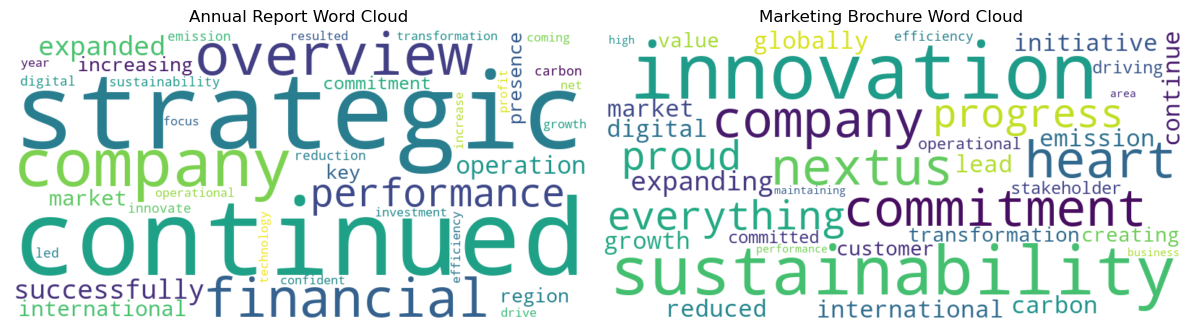

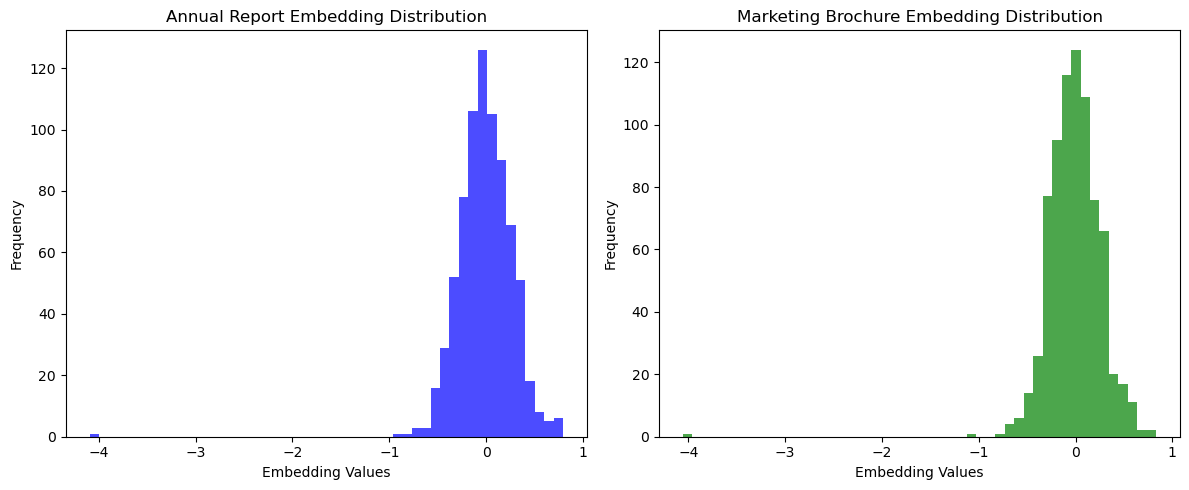

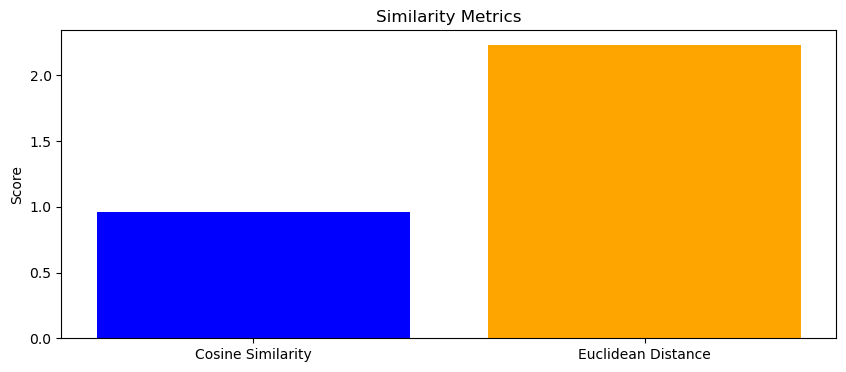

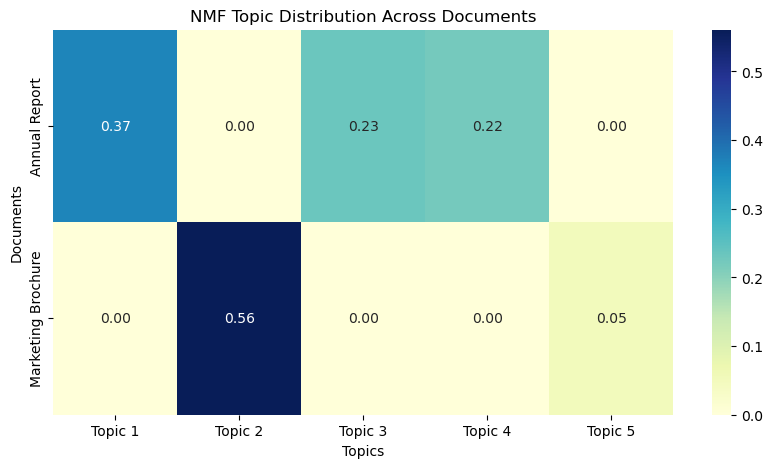


NMF Topics:
Topic 1: continued, strategic, transformation, sustainability, performance, operational, international
Topic 2: innovation, sustainability, progress, nextus, maintaining, lead, expanding
Topic 3: focus, overview, efficiency, coming, digital, continued, strategic
Topic 4: key, strategic, continued, presence, profit, increase, led
Topic 5: area, carbon, growth, transformation, driving, international, committed


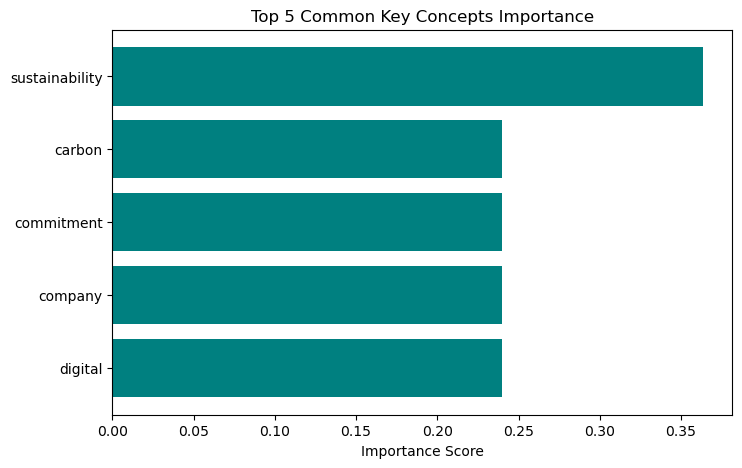


Business Relevance of Top Key Concepts:
- 'sustainability' aligns with Brand positioning as environmentally conscious
- 'carbon' aligns with Environmental responsibility initiatives

Content Overlap Analysis:
Common vocabulary: 13 terms (21.7% of total unique terms)
Terms unique to Annual Report: 25
Terms unique to Marketing Brochure: 22


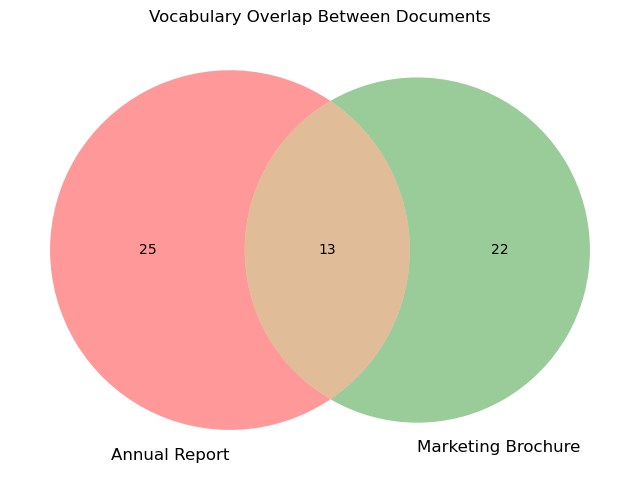

In [ ]:
# ==============================================
# 6. VISUALIZATION DASHBOARD
# ==============================================

# (a) Word Cloud Generation
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    return wordcloud

# Generate word clouds for both documents
wordcloud_annual = generate_wordcloud(lem_annual_report)
wordcloud_marketing = generate_wordcloud(lem_marketing_brochure)

# Display the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_annual, interpolation='bilinear')
plt.axis('off')
plt.title('Annual Report Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_marketing, interpolation='bilinear')
plt.axis('off')
plt.title('Marketing Brochure Word Cloud')

plt.tight_layout()
plt.show()

# (b) Histogram Visualization of Embedding Values
plt.figure(figsize=(12, 5))

# Histogram for Annual Report embedding distribution
plt.subplot(1, 2, 1)
plt.hist(embedding_annual.flatten().numpy(), bins=50, color='blue', alpha=0.7)
plt.title('Annual Report Embedding Distribution')
plt.xlabel('Embedding Values')
plt.ylabel('Frequency')

# Histogram for Marketing Brochure embedding distribution
plt.subplot(1, 2, 2)
plt.hist(embedding_marketing.flatten().numpy(), bins=50, color='green', alpha=0.7)
plt.title('Marketing Brochure Embedding Distribution')
plt.xlabel('Embedding Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# (c) Similarity Metrics Bar Plot
# Define similarity metrics and corresponding scores
metrics = ['Cosine Similarity', 'Euclidean Distance']
scores = [cosine_similarity_score, euclidean_distance]

# Create a bar plot to visualize similarity metrics
plt.figure(figsize=(10, 4))
plt.bar(metrics, scores, color=['blue', 'orange'])
plt.title('Similarity Metrics')
plt.ylabel('Score')
plt.show()

# (d) Topic Distribution Heatmap using NMF (Moved outside the function)
# Use the NMF model and TF-IDF matrix from the returned dictionary
# Extract topic distribution from the NMF model
doc_topics = topic_models["nmf_model"].transform(topic_models["tfidf_matrix"])

# Define topic names and document labels
topic_names = [f"Topic {i+1}" for i in range(topic_models["nmf_model"].n_components)]
doc_names = ['Annual Report', 'Marketing Brochure']

# Convert topic distribution to a DataFrame
df_topics = pd.DataFrame(doc_topics, index=doc_names, columns=topic_names)

# Generate heatmap visualization of topic distribution
plt.figure(figsize=(10, 5))
sns.heatmap(df_topics, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('NMF Topic Distribution Across Documents')
plt.xlabel("Topics")
plt.ylabel("Documents")
plt.show()

# Print extracted topics
print("\nNMF Topics:")
for i, topic in enumerate(topic_models["nmf"], 1):
    print(f"Topic {i}: {', '.join(topic)}")

# (e) Key Concepts Importance: Horizontal Bar Chart
# Extract top 5 key concepts and their importance scores
top_concepts = [item[0] for item in top5_common]
importance_scores = [item[1] for item in top5_common]

# Generate a horizontal bar chart to visualize concept importance
plt.figure(figsize=(8, 5))
plt.barh(top_concepts, importance_scores, color='teal')
plt.xlabel("Importance Score")
plt.title("Top 5 Common Key Concepts Importance")
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()

# (f) Business Relevance of Key Concepts
# Define key business objectives related to key concepts
business_objectives = {
    "sustainability": "Brand positioning as environmentally conscious",
    "international": "Global market expansion strategy",
    "digital transformation": "Technological innovation focus",
    "efficiency": "Operational excellence emphasis",
    "growth": "Business development and scaling",
    "innovation": "Market leadership and differentiation",
    "technology": "Digital capabilities and competitiveness",
    "carbon": "Environmental responsibility initiatives"
}

# Display business relevance of top key concepts
print("\nBusiness Relevance of Top Key Concepts:")
for concept, score in top5_key_concepts:
    for key, value in business_objectives.items():
        if key in concept.lower():
            print(f"- '{concept}' aligns with {value}")

# (g) Content Overlap Analysis
# Extract unique words from each document
annual_words = set(lem_annual_report.split())
marketing_words = set(lem_marketing_brochure.split())

# Identify common and unique words
common_vocab = annual_words.intersection(marketing_words)
unique_to_annual = annual_words - marketing_words
unique_to_marketing = marketing_words - annual_words

# Calculate percentage overlap
overlap_percentage = len(common_vocab) / len(annual_words.union(marketing_words)) * 100

# Display content overlap analysis
print("\nContent Overlap Analysis:")
print(f"Common vocabulary: {len(common_vocab)} terms ({overlap_percentage:.1f}% of total unique terms)")
print(f"Terms unique to Annual Report: {len(unique_to_annual)}")
print(f"Terms unique to Marketing Brochure: {len(unique_to_marketing)}")

# (e) Venn Diagram of Concept Overlap
# Generate a Venn diagram to visualize vocabulary overlap
plt.figure(figsize=(8, 6))
venn2([annual_words, marketing_words], set_labels=('Annual Report', 'Marketing Brochure'))
plt.title('Vocabulary Overlap Between Documents')
plt.show()

In [ ]:
# ==============================================
# 5. BUSINESS INSIGHTS AND INTERPRETATIONS
# ==============================================

# --- Final Business Insights Summary ---
final_summary = f"""
Final Interpretation and Business Insights:
-------------------------------------------------
The high cosine similarity score ({cosine_similarity_score:.2f}) and low Euclidean distance ({euclidean_distance:.2f})
indicate that the Annual Report and Marketing Brochure are highly aligned in their messaging.

Key Observations:
- Common keywords such as {', '.join([w for w, _ in top5_common])} highlight shared focus areas like sustainability
  and digital transformation.
- Unique terms in the Annual Report (e.g., {', '.join([w for w, _ in top5_unique_doc1])}) emphasize strategic investments
  and growth.
- Unique terms in the Marketing Brochure (e.g., {', '.join([w for w, _ in top5_unique_doc2])}) reflect an emphasis on innovation
  and customer value.
- Topic modeling reveals themes related to sustainability, innovation, and operational performance.
- Sentiment analysis shows a consistently positive tone, with the Annual Report classified as {sentiment_results_annual['distilbert'][0]['label']} (confidence: {sentiment_results_annual['distilbert'][0]['score']:.2%})
  and the Marketing Brochure classified as {sentiment_results_marketing['distilbert'][0]['label']} (confidence: {sentiment_results_marketing['distilbert'][0]['score']:.2%}).

Business Implications:
- Consistency in internal reporting and external marketing reinforces brand credibility and investor confidence.
- The shared key concepts suggest that the company’s strategic priorities are well-communicated across channels.
- Leveraging these insights can help refine future communication strategies to maintain consistency
  while also addressing emerging topics.

Overall, this NLP analysis provides actionable insights to enhance corporate communications and align messaging with business objectives.
"""

print(final_summary)


Final Interpretation and Business Insights:
-------------------------------------------------
The high cosine similarity score (0.96) and low Euclidean distance (2.23) 
indicate that the Annual Report and Marketing Brochure are highly aligned in their messaging.

Key Observations:
- Common keywords such as sustainability, carbon, commitment, company, digital highlight shared focus areas like sustainability 
  and digital transformation.
- Unique terms in the Annual Report (e.g., continued, strategic, coming, confident, drive) emphasize strategic investments 
  and growth.
- Unique terms in the Marketing Brochure (e.g., innovation, area, business, committed, continue) reflect an emphasis on innovation 
  and customer value.
- Topic modeling reveals themes related to sustainability, innovation, and operational performance.
- Sentiment analysis shows a consistently positive tone, with the Annual Report classified as POSITIVE (confidence: 99.97%)
  and the Marketing Brochure classified as

In [ ]:
# ==============================================
# 7. IMPLICATIONS FOR BUSINESS COMMUNICATION
# ==============================================
implications = """
Implications for Business Communication:
------------------------------------------
1. Maintain Messaging Consistency:
   - The strong alignment between internal reports and external marketing materials reinforces a coherent corporate narrative.
2. Leverage NLP for Regular Communication Audits:
   - Automated pipelines can continuously monitor alignment across different communication channels.
3. Develop a Corporate Language Guide:
   - Establish a glossary of key business terms to ensure consistent terminology usage.
4. Cross-functional Communication Planning:
   - Collaboration between strategic, marketing, and communications teams is essential for unified messaging.
5. Personalized Communication:
   - While core messaging should remain consistent, adapting tone and emphasis for different audiences can further strengthen engagement.

Future NLP applications include automated consistency checking, advanced topic tracking, competitive differentiation analysis, and sentiment alignment monitoring.
"""

print(implications)


Implications for Business Communication:
------------------------------------------
1. Maintain Messaging Consistency:
   - The strong alignment between internal reports and external marketing materials reinforces a coherent corporate narrative.
2. Leverage NLP for Regular Communication Audits:
   - Automated pipelines can continuously monitor alignment across different communication channels.
3. Develop a Corporate Language Guide:
   - Establish a glossary of key business terms to ensure consistent terminology usage.
4. Cross-functional Communication Planning:
   - Collaboration between strategic, marketing, and communications teams is essential for unified messaging.
5. Personalized Communication:
   - While core messaging should remain consistent, adapting tone and emphasis for different audiences can further strengthen engagement.

Future NLP applications include automated consistency checking, advanced topic tracking, competitive differentiation analysis, and sentiment alignment 